<a href="https://colab.research.google.com/github/pherathm/KID_Museum_Web/blob/main/DATA205_KID_MUSEUM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01_Data_Cleaning_and_Preprocessing.ipynb

Course: DATA 205  
Student: Piushani Ellegala  

This notebook documents the key data cleaning and preprocessing steps
applied to KID Museum program datasets prior to analysis. Full technical
details and code are provided below.

### Data Upload
The General Admissions dataset was uploaded directly into the Google
Colab environment to support data inspection and cleaning.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving after_school.csv to after_school.csv
Saving after_school_revised.xlsx to after_school_revised.xlsx
Saving field_trips.csv to field_trips.csv
Saving field_trips_revised.xlsx to field_trips_revised.xlsx
Saving general_admission.csv to general_admission.csv
Saving general_admissions_revised.xlsx to general_admissions_revised.xlsx
Saving MCPS_DCPS_Geocoordinates.csv to MCPS_DCPS_Geocoordinates.csv


## General Admissions (Revised) – Descriptive Statistics
This section summarizes the key characteristics of the revised General
Admissions dataset, focusing on visit counts, participant numbers, and
core categorical variables.

In [54]:
import pandas as pd
import numpy as np

ga_rev = pd.read_excel("general_admissions_revised.xlsx")

# Overview
ga_rev.shape

(39349, 14)

In [4]:
# Column structure and data types
ga_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39349 entries, 0 to 39348
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Event Date                39329 non-null  datetime64[ns]
 1   Ticket Price Level: Name  39349 non-null  object        
 2   Quantity                  39349 non-null  int64         
 3   Order Status              39349 non-null  object        
 4   Email                     38853 non-null  object        
 5   Order Source              23606 non-null  object        
 6   Ticket Order Name         39349 non-null  object        
 7   Contact ID                39326 non-null  object        
 8   Discount Code: Name       17910 non-null  object        
 9   Amount Paid               39348 non-null  float64       
 10  Street Address            26708 non-null  object        
 11  City                      26984 non-null  object        
 12  State             

In [26]:
ga_rev.columns = (
    ga_rev.columns
    .astype(str)
    .str.strip()
    .str.replace("\u00a0", " ")  # removes hidden non breaking spaces
)

In [27]:
ga_rev = ga_rev.dropna(subset=["Event Date", "Quantity"]) # remove missing values of two critical columns I consider here

In [32]:
ga_rev[["Event Date", "Quantity"]].isna().sum() #check missing values

,0
Event Date,0
Quantity,0


After cleaning, no missing values remained in the critical fields
Event Date and Quantity, confirming that the dataset was suitable
for descriptive analysis.

In [41]:
# Numeric descriptive statistics
ga_rev[["Quantity", "Amount Paid"]].describe()

,Quantity,Amount Paid
count,39329.0,39328.000000
mean,1.0,23.991839
std,0.0,33.884291
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,45.000000
max,1.0,1260.000000


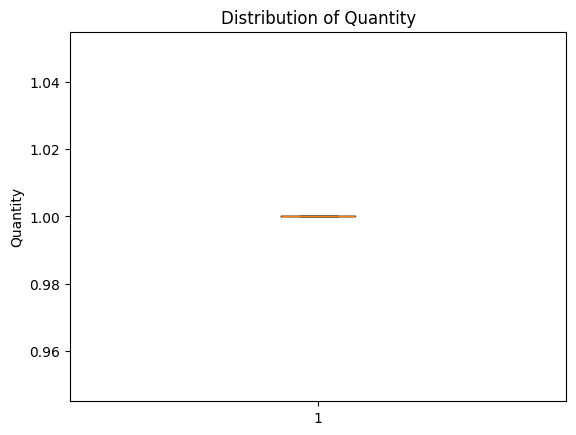

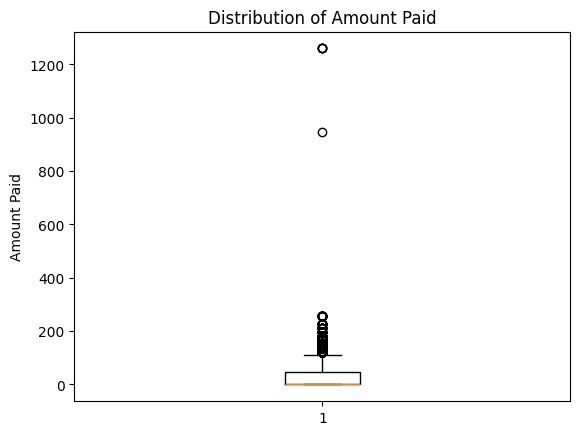

In [56]:
#check the distribution

import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(ga_rev["Quantity"])
plt.title("Distribution of Quantity")
plt.ylabel("Quantity")
plt.show()

import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(ga_rev["Amount Paid"].dropna())
plt.title("Distribution of Amount Paid")
plt.ylabel("Amount Paid")
plt.show()



Descriptive statistics show that the Quantity value is always one, which means each record represents a single ticket or unit. The Amount Paid values vary widely, with a median of zero and a few high payments. This indicates that many admissions were free or discounted, while fewer transactions involved paid entries, creating a right-skewed distribution.

## After-School Programs (Revised) – Descriptive Statistics
This section provides a summary of the revised After-School dataset,
highlighting participation levels and program distribution.

In [71]:
af_rev = pd.read_excel("after_school_revised.xlsx")

# Overview
af_rev.shape

(407, 21)

In [72]:
# Structure and missing values
af_rev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Contact: Contact ID           407 non-null    object        
 1   Account: Account Name         407 non-null    object        
 2   Attendee Name (Child's Name)  347 non-null    object        
 3   Contact: Full Name            407 non-null    object        
 4   Name                          407 non-null    object        
 5   Name.1                        407 non-null    object        
 6   Event Date                    407 non-null    datetime64[ns]
 7   Quantity                      407 non-null    int64         
 8   Ticket Price Level: Name      407 non-null    object        
 9   Email                         407 non-null    object        
 10  Created Date                  407 non-null    object        
 11  Order Source                  30

In [73]:
af_rev.columns = (
    af_rev.columns
    .astype(str)
    .str.strip()
    .str.replace("\u00a0", " ")  # removes hidden non breaking spaces
)

In [74]:
af_rev = af_rev.dropna(subset=["Event Date", "Quantity"]) # remove missing values of two critical columns I consider here

In [75]:
af_rev[["Event Date", "Quantity"]].isna().sum() #check missing values

,0
Event Date,0
Quantity,0


In [76]:
# Numeric descriptive statistics
af_rev[["Quantity", "Amount Paid"]].describe()

,Quantity,Amount Paid
count,407.0,407.000000
mean,1.0,309.977273
std,0.0,88.198494
min,1.0,0.000000
25%,1.0,315.000000
50%,1.0,345.000000
75%,1.0,345.000000
max,1.0,395.000000


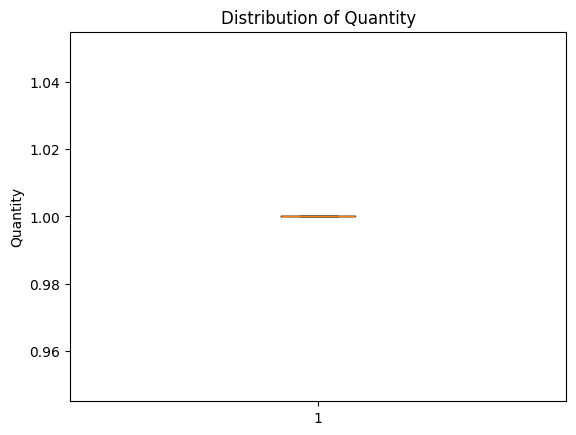

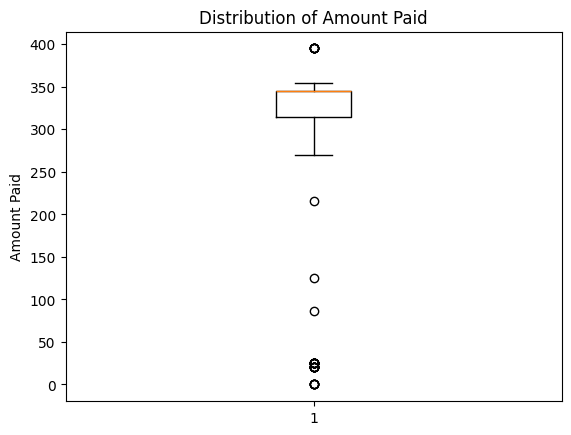

In [85]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(af_rev["Quantity"])
plt.title("Distribution of Quantity")
plt.ylabel("Quantity")
plt.show()

import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(af_rev["Amount Paid"].dropna())
plt.title("Distribution of Amount Paid")
plt.ylabel("Amount Paid")
plt.show()

The After-School Amount Paid distribution is left-skewed, with most values
clustered at higher payment levels and a smaller number of low or zero
values extending toward the lower end.

## Field Trips (Revised) – Descriptive Statistics
This section summarizes the revised Field Trips dataset, focusing on
visit frequency, group size, and geographic attributes.

In [59]:
ft_rev = pd.read_excel("field_trips_revised.xlsx")

# Overview
ft_rev.shape

(571, 20)

In [60]:
# Data structure
ft_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Account ID                    569 non-null    object        
 1   Visit Date                    569 non-null    datetime64[ns]
 2   Location                      569 non-null    object        
 3   Account Name                  569 non-null    object        
 4   Booking Status                569 non-null    object        
 5   Visit Booking: Visit Booking  569 non-null    object        
 6   Number of Teachers            568 non-null    float64       
 7   Number of Chaperones          536 non-null    float64       
 8   Number of Participants        570 non-null    float64       
 9   Grade(s)                      469 non-null    object        
 10  District                      569 non-null    object        
 11  School/Group Type             56

In [82]:
ft_rev.columns = (
    ft_rev.columns
    .astype(str)
    .str.strip()
    .str.replace("\u00a0", " ")  # removes hidden non breaking spaces
)

In [80]:
ft_rev = ft_rev.dropna(subset=["Number of Participants", "Number of Teachers","Number of Chaperones"]) # remove missing values of two critical columns I consider here

In [84]:
ft_rev[[
    "Number of Participants",
    "Number of Teachers",
    "Number of Chaperones"
]].isna().sum() #check missing values

,0
Number of Participants,0
Number of Teachers,0
Number of Chaperones,0


In [87]:
# Numeric descriptive statistics
ft_rev[["Number of Participants",
    "Number of Teachers",
    "Number of Chaperones"]].describe()

,Number of Participants,Number of Teachers,Number of Chaperones
count,535.000000,535.000000,535.000000
mean,50.054206,2.011215,4.771963
std,25.333411,2.206533,4.625726
min,6.000000,1.000000,0.000000
25%,27.000000,1.000000,2.000000
50%,50.000000,1.000000,4.000000
75%,65.000000,2.000000,6.000000
max,150.000000,18.000000,34.000000


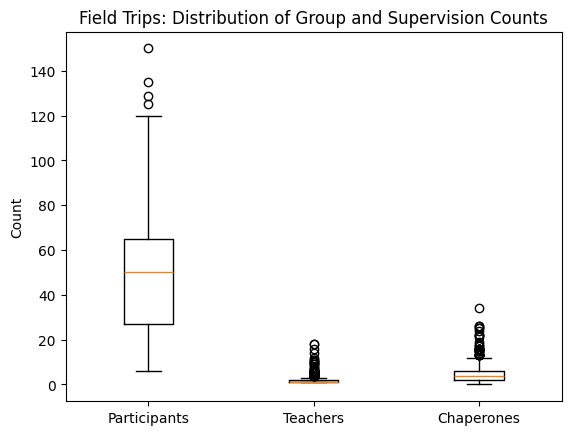

In [89]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot([
    ft_rev["Number of Participants"].dropna(),
    ft_rev["Number of Teachers"].dropna(),
    ft_rev["Number of Chaperones"].dropna()
])

plt.xticks([1, 2, 3], ["Participants", "Teachers", "Chaperones"])
plt.title("Field Trips: Distribution of Group and Supervision Counts")
plt.ylabel("Count")
plt.show()


The box plot shows that Field Trip group sizes vary a lot, with most trips having around fifty students and a few very large groups. Teacher and chaperone counts are much lower and remain fairly consistent across trips.

#Explorarory Data Analysis

**General Admission**

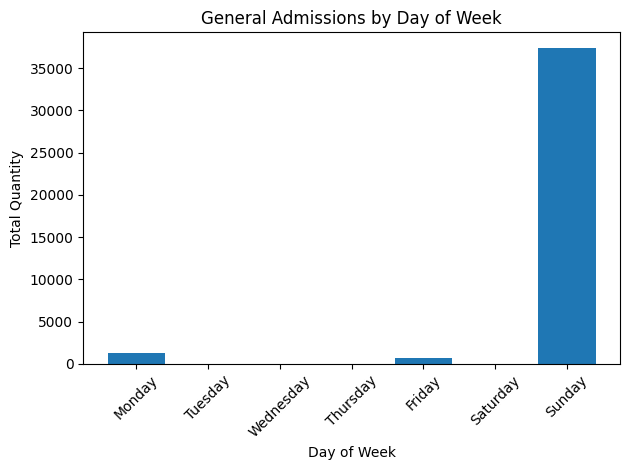

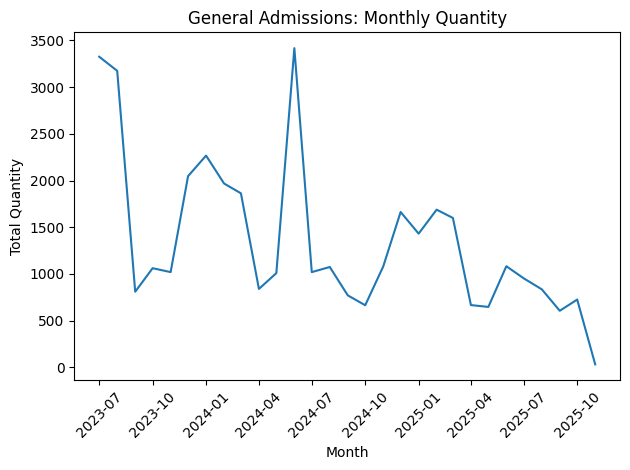

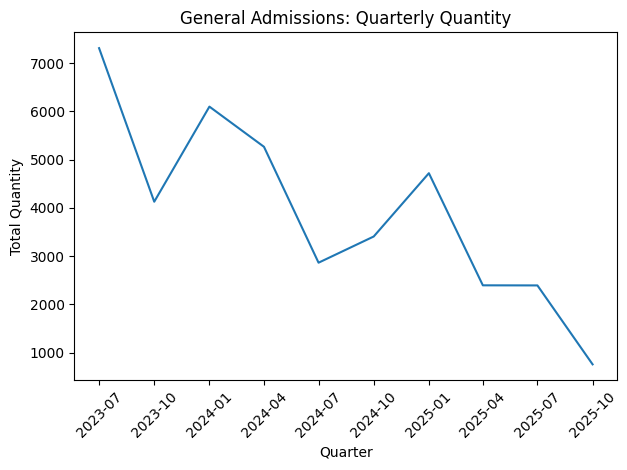

In [103]:
#Weekly, Monthly and Quartaly Time Series

#weekly time series
# Ensure datetime
ga_rev["Event Date"] = pd.to_datetime(ga_rev["Event Date"])

# Create weekday column
ga_rev["Weekday"] = ga_rev["Event Date"].dt.day_name()

# Correct weekday order
weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

# Aggregate quantity by weekday
ga_weekday = (
    ga_rev
    .groupby("Weekday")["Quantity"]
    .sum()
    .reindex(weekday_order)
)

# Bar plot
plt.figure()
plt.bar(ga_weekday.index, ga_weekday.values)
plt.title("General Admissions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#monthly time series
ga_monthly = ga_rev.groupby(
    ga_rev["Event Date"].dt.to_period("M")
)["Quantity"].sum()
ga_monthly.index = ga_monthly.index.to_timestamp()

plt.figure()
plt.plot(ga_monthly)
plt.title("General Admissions: Monthly Quantity")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#qyuartaly time series
ga_quarterly = ga_rev.groupby(
    ga_rev["Event Date"].dt.to_period("Q")
)["Quantity"].sum()
ga_quarterly.index = ga_quarterly.index.to_timestamp()

plt.figure()
plt.plot(ga_quarterly)
plt.title("General Admissions: Quarterly Quantity")
plt.xlabel("Quarter")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Field Trips**

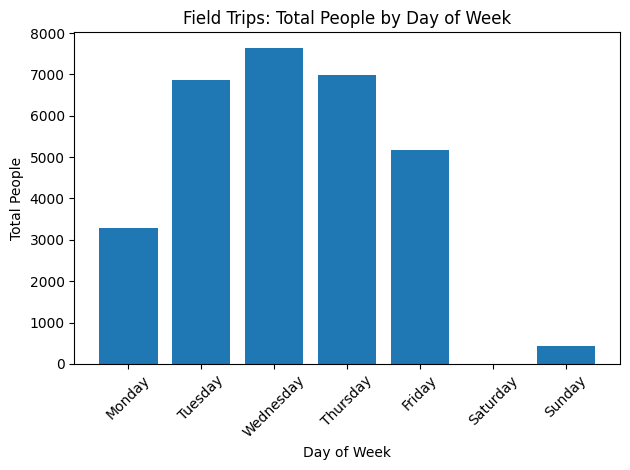

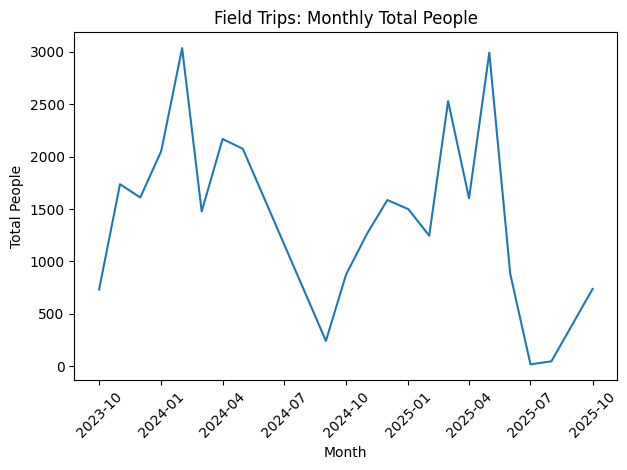

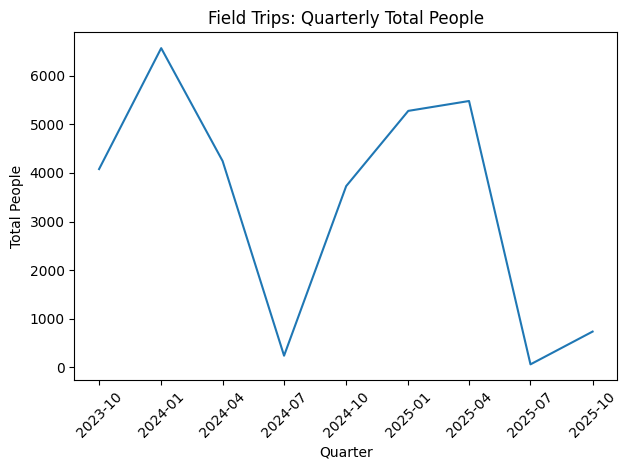

In [111]:
# Ensure datetime
ft_rev["Visit Date"] = pd.to_datetime(ft_rev["Visit Date"])

# Total people for Field Trips
ft_rev["Total People"] = (
    ft_rev["Number of Participants"].fillna(0) +
    ft_rev["Number of Teachers"].fillna(0) +
    ft_rev["Number of Chaperones"].fillna(0)
)

# Weekly (by day of week)
ft_rev["Weekday"] = ft_rev["Visit Date"].dt.day_name()

weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

ft_weekday_total = (
    ft_rev.groupby("Weekday")["Total People"]
    .sum()
    .reindex(weekday_order)
)

plt.figure()
plt.bar(ft_weekday_total.index, ft_weekday_total.values)
plt.title("Field Trips: Total People by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly
ft_monthly_total = ft_rev.groupby(
    ft_rev["Visit Date"].dt.to_period("M")
)["Total People"].sum()
ft_monthly_total.index = ft_monthly_total.index.to_timestamp()

plt.figure()
plt.plot(ft_monthly_total)
plt.title("Field Trips: Monthly Total People")
plt.xlabel("Month")
plt.ylabel("Total People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quarterly
ft_quarterly_total = ft_rev.groupby(
    ft_rev["Visit Date"].dt.to_period("Q")
)["Total People"].sum()
ft_quarterly_total.index = ft_quarterly_total.index.to_timestamp()

plt.figure()
plt.plot(ft_quarterly_total)
plt.title("Field Trips: Quarterly Total People")
plt.xlabel("Quarter")
plt.ylabel("Total People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**After School**

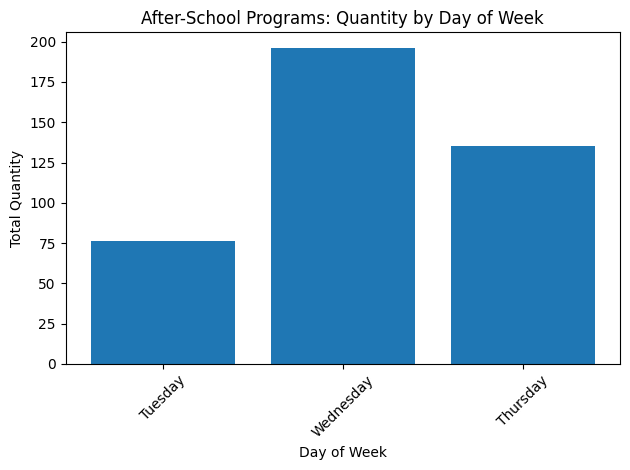

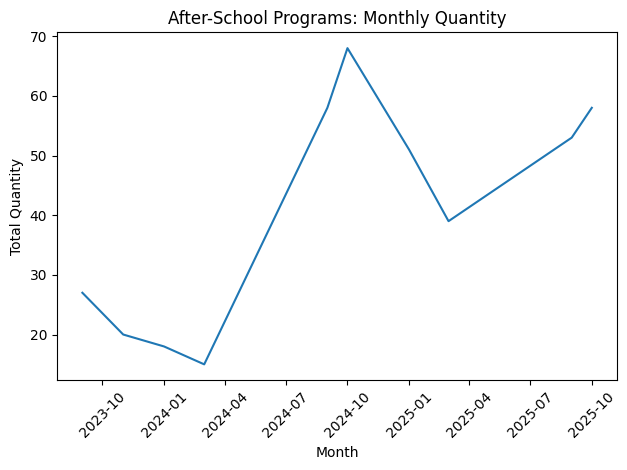

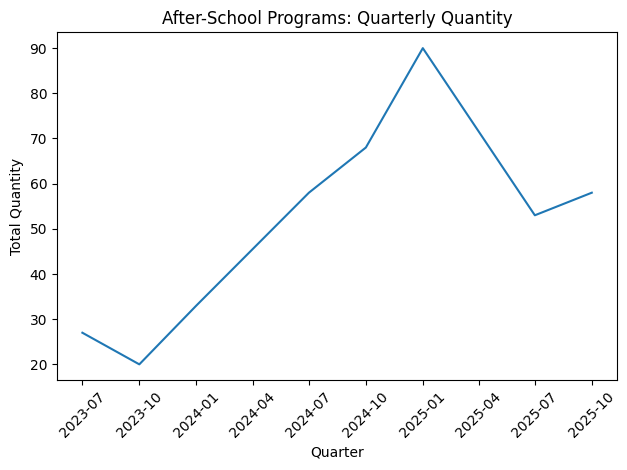

In [112]:
af_rev["Event Date"] = pd.to_datetime(af_rev["Event Date"])

# --------------------
# Weekly (by weekday)
# --------------------
af_rev["Weekday"] = af_rev["Event Date"].dt.day_name()

weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

af_weekday = (
    af_rev.groupby("Weekday")["Quantity"]
    .sum()
    .reindex(weekday_order)
)

plt.figure()
plt.bar(af_weekday.index, af_weekday.values)
plt.title("After-School Programs: Quantity by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------
# Monthly
# --------------------
af_monthly = af_rev.groupby(
    af_rev["Event Date"].dt.to_period("M")
)["Quantity"].sum()
af_monthly.index = af_monthly.index.to_timestamp()

plt.figure()
plt.plot(af_monthly)
plt.title("After-School Programs: Monthly Quantity")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------
# Quarterly
# --------------------
af_quarterly = af_rev.groupby(
    af_rev["Event Date"].dt.to_period("Q")
)["Quantity"].sum()
af_quarterly.index = af_quarterly.index.to_timestamp()

plt.figure()
plt.plot(af_quarterly)
plt.title("After-School Programs: Quarterly Quantity")
plt.xlabel("Quarter")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Analysis and Results**

Further Analysis and visualizations of this project are documented here:

https://pherathm.github.io/KID_Museum_Web/

Please visit the link above to explore the full analysis.